In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/Savinda/netSpeed/master/log.csv'
names = ['timestamp', 'lat', 'long', 'upload_speed', 'download_speed', 'isp']
dataset = pd.read_csv(url, names=names)
dataset.head()

,timestamp,lat,long,upload_speed,download_speed,isp
0,2020-03-13 14:07:15,123.231.127.164,77.025,2.350924e+07,2.649214e+06,Dialog Axiata PLC
1,2020-03-13 14:17:45,123.231.127.164,74.654,1.594218e+07,3.898107e+06,Dialog Axiata PLC
2,2020-03-13 14:28:20,123.231.127.164,66.853,1.384075e+07,2.340964e+06,Hutchison Telecommunications Lanka (Pvt) Limited
3,2020-03-13 14:38:53,123.231.127.164,71.082,2.549592e+07,4.133795e+06,Dialog Axiata PLC
4,2020-03-13 14:49:24,123.231.127.164,70.523,2.394135e+07,4.239118e+06,Dialog Axiata PLC


In [9]:
# lets see how this goes when I get more data
dataset.shape
dataset.describe()

,long,upload_speed,download_speed
count,6.000000,6.000000e+00,6.000000e+00
mean,71.028333,2.156930e+07,3.778362e+06
std,4.283701,5.336430e+06,1.127205e+06
min,66.033000,1.384075e+07,2.340964e+06
25%,67.770500,1.783394e+07,2.961437e+06
50%,70.802500,2.372530e+07,4.015951e+06
75%,73.761000,2.510728e+07,4.212787e+06
max,77.025000,2.668634e+07,5.408974e+06


In [15]:
# class distribution
class_counts = dataset.groupby('isp').size()
print(class_counts)

isp
Dialog Axiata PLC                                   5
Hutchison Telecommunications Lanka (Pvt) Limited    1
dtype: int64


In [16]:
# correlation between attributes
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = dataset.corr(method='pearson')
print(correlations)

                 long  upload_speed  download_speed
long            1.000        -0.027          -0.360
upload_speed   -0.027         1.000           0.634
download_speed -0.360         0.634           1.000


In [17]:
# skew for each attribute
skew = dataset.skew()
print(skew)

long              0.251
upload_speed     -0.838
download_speed    0.015
dtype: float64


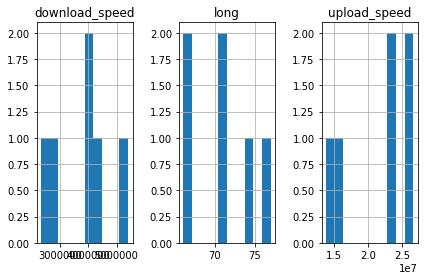

In [20]:
# univariata histogram
dataset.hist(layout=(1,3))
plt.tight_layout()
plt.show()